In [1]:
import os, sys
os.environ["MKL_THREADING_LAYER"]="GNU"
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from results_summary import load_all_models

Using cuDNN version 6021 on context None
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:84:00.0)
/nfs/nhome/live/kevinli/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dl_args = dict(npoint=300, nlayer=3, nneuron=30, init_log_lam=-3, points_std=0.0, keep_prob=1.0, init_weight_std=1.0, noise_std=0.05,
                    points_type="opt", log_lam_weights=-6, step_size=1e-2, mixture_kernel=False, 
               init_log_sigma=np.linspace(0,1,3), base=True,
                    niter=10000, ntrain=100, nvalid=100, patience=200, gpu_count=0, clip_score=False,
                curve_penalty=True)

others_args = dict( n_hiddens = [100]*2,
                    n_comps = 10,
                    n_layers = 5,
                    act_fun = 'tanh',
                    mode = 'random')

* `p` is the data object
* `m` is a dict of all models
* `l` is a dict of log liks
* `s` is a dict of samples (not for dkef)

In [3]:
seed = 0
data_name = "redwine"
p, m, l, s = load_all_models(data_name, seed, dl_args, others_args, skip_theano=True)

INFO:tensorflow:Restoring parameters from ckpts/R_D11_l3_nd30_np300_nt100_nv100_pto_ss100_ni10000_n05_k10_m0_b1_p200_nk3_cl0_cu1_q1_s00.ckpt


In [4]:
d = m["dkef"]


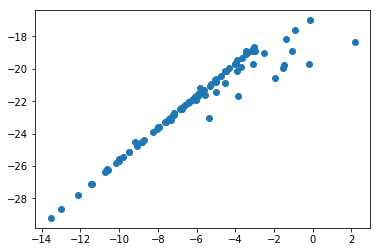

In [12]:
plt.scatter(q_rand_fv  , q_logq)

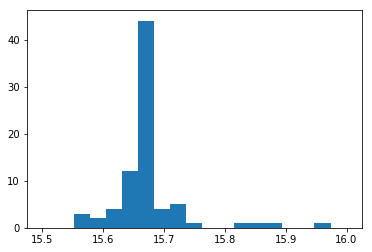

In [6]:
import tensorflow as tf
q_rand_fv, q_rand_kfv, q_logq, q_sample = d.sess.run([d.nodes["q_rand_fv"],d.nodes["q_rand_kfv"],d.nodes["q_logq"], d.nodes["q_sample"]] , feed_dict={d.nodes["n_rand"]:100})
plt.hist(q_rand_fv-q_logq, bins=np.linspace(15.5,16,20));


In [7]:
d = m["dkef"]
d.estimate_normaliser(100000, batch_size=1000)
logr = d.get_q_logr(10000)

estimating logZ: 100%|████████████████████████████████████████████| 100/100 [00:01<00:00, 78.88it/s]


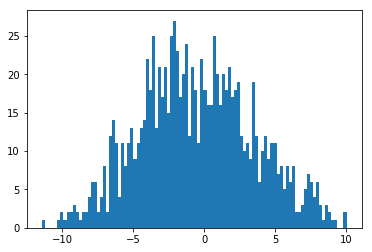

In [8]:
plt.hist(d.fun_multiple(np.random.randn(1000,11)), bins=100);

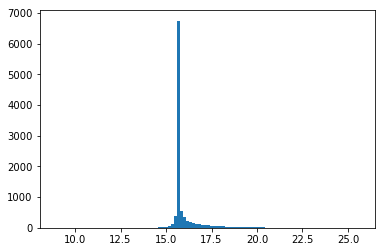

In [9]:
plt.hist(logr, bins=100);

In [15]:
d.eval(p.test_data, n=10**5).mean()


estimating logZ: 100%|████████████████████████████████████████████| 100/100 [00:01<00:00, 91.05it/s]

-13.211343983715848

estimating logZ:   0%|▏                                      | 328/100000 [00:20<1:41:17, 16.40it/s]

In [5]:
d.q_estimate_normaliser(100000, batch_size=1000)

estimating logZ: 100%|████████████████████████████████████████████| 100/100 [00:01<00:00, 63.86it/s]


19.196891349068423

In [6]:
d = m["dkef"]
r1 = d.get_logr(10000)
r2 = d.get_q_logr(10000)

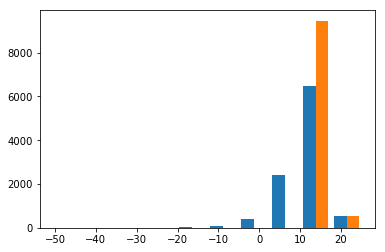

In [7]:
plt.hist([r1,r2]);